In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%cd /content/drive/MyDrive/Pump It Up

/content/drive/MyDrive/Pump It Up


In [3]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
labels = pd.read_csv("labels.csv")

In [4]:
print(train.shape)
print(test.shape)
print(labels.shape)

(59400, 40)
(14850, 40)
(59400, 2)


## EDA

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [84]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [85]:
labels["status_group"].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

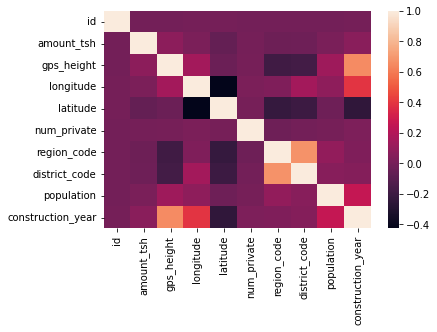

In [86]:
sns.heatmap(train.corr())

In [5]:
train["status_group"] = labels["status_group"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

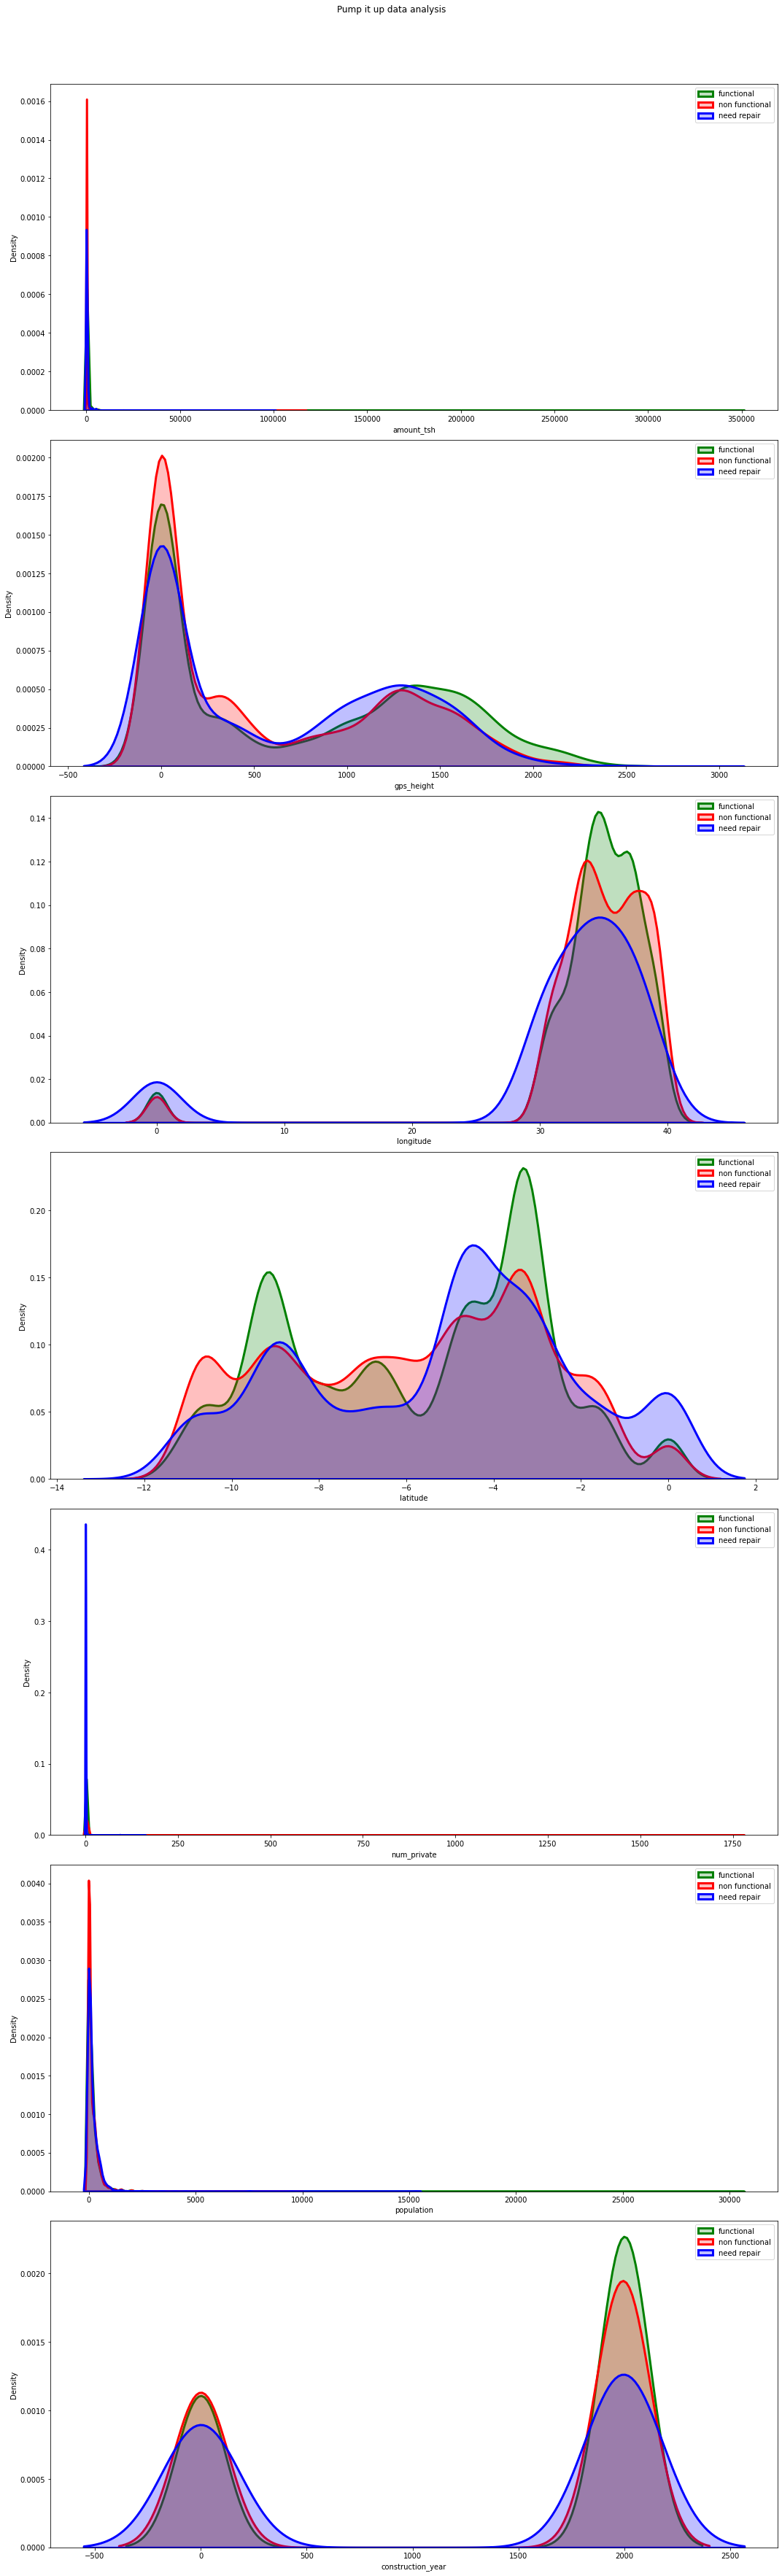

In [88]:
columns = ['amount_tsh', 
           'gps_height', 
           'longitude', 
           'latitude',
           'num_private', 
           'population', 
           'construction_year']

fig, axes = plt.subplots(7, 1, figsize = (15, 50))
j = 0
for i in columns:
    sns.distplot(train[i][labels['status_group']=='functional'], color='g', label = 'functional', ax=axes[j], hist = False, 
                 kde = True, kde_kws = {'shade': True, 'linewidth': 3})
    sns.distplot(train[i][labels['status_group']=='non functional'], color='r', label = 'non functional', ax=axes[j], hist = False, 
                 kde = True, kde_kws = {'shade': True, 'linewidth': 3})
    sns.distplot(train[i][labels['status_group']=='functional needs repair'], color='b', label = 'need repair', ax=axes[j], hist = False, 
                 kde = True, kde_kws = {'shade': True, 'linewidth': 3})
    axes[j].legend()
    j += 1
fig.suptitle('Pump it up data analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

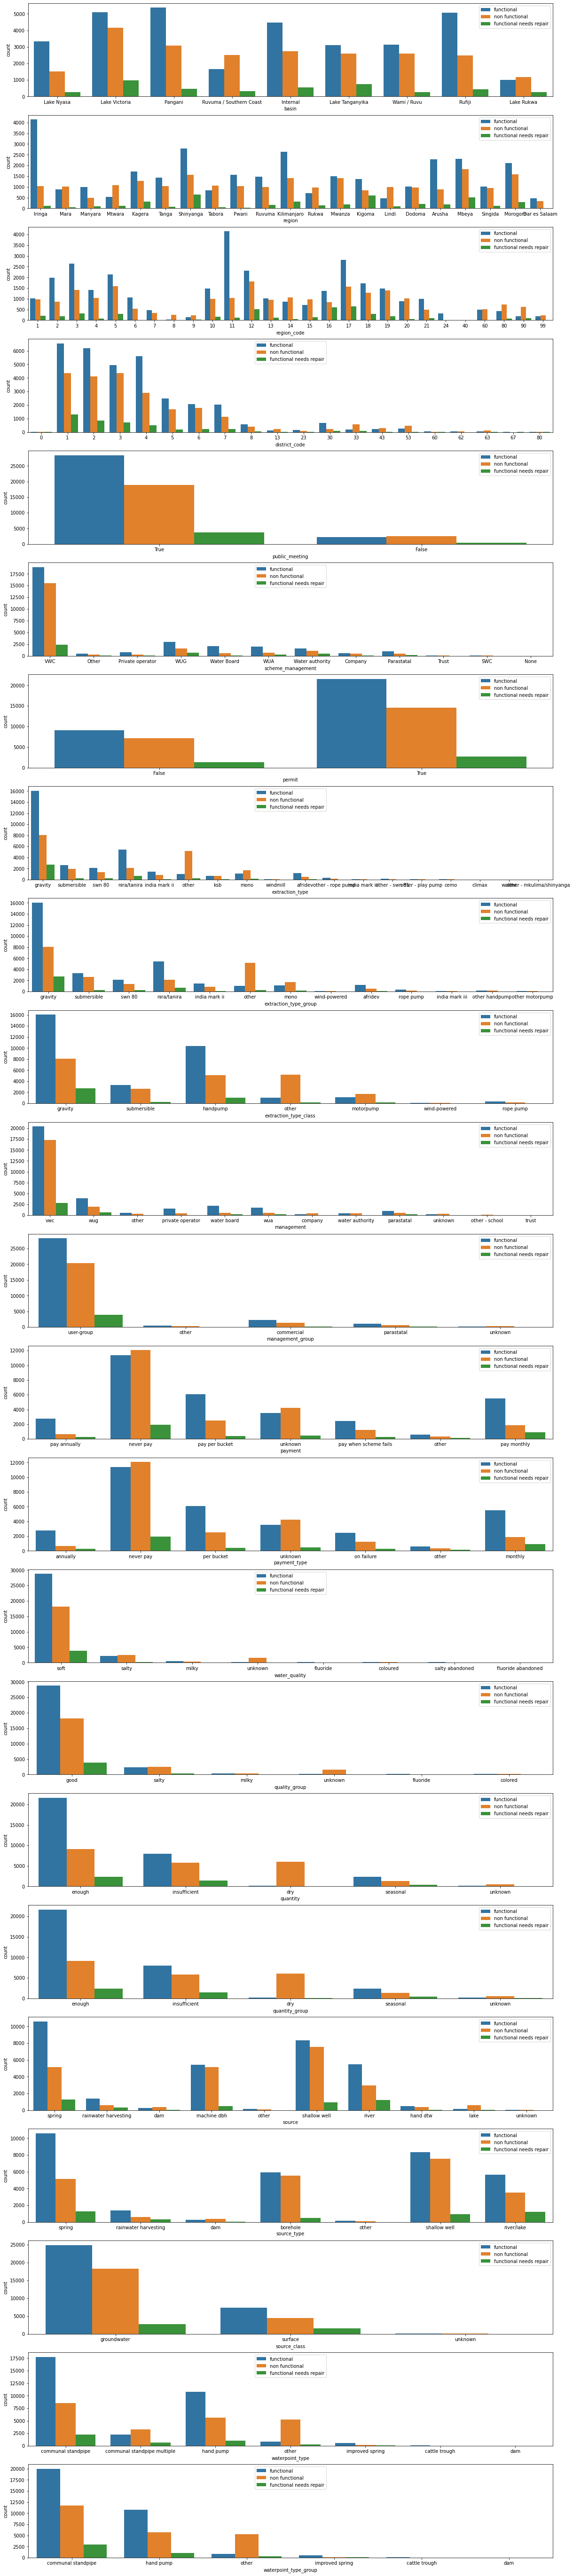

In [89]:
columns = ["basin", 
           "region", 
           "region_code", 
           "district_code", 
           "public_meeting", 
           "scheme_management", 
           "permit", 
           "extraction_type", 
           "extraction_type_group", 
           "extraction_type_class", 
           "management", 
           "management_group", 
           "payment", 
           "payment_type", 
           "water_quality", 
           "quality_group", 
           "quantity", 
           "quantity_group", 
           "source", 
           "source_type", 
           "source_class", 
           "waterpoint_type", 
           "waterpoint_type_group"]

fig, axes = plt.subplots(23, 1, figsize = (20, 100))
j = 0
for i in columns:
    sns.countplot(data=train, x=i, hue="status_group", ax=axes[j])
    axes[j].legend(loc='best')
    j += 1
plt.show()

In [90]:
train.groupby(["district_code", "region"]).size()

district_code  region       
0              Dodoma            23
1              Arusha           189
               Dar es Salaam     93
               Dodoma           888
               Iringa           728
                               ... 
62             Lindi            109
63             Mtwara           158
               Pwani             37
67             Pwani              6
80             Shinyanga         12
Length: 132, dtype: int64

In [91]:
train.groupby(["region", "lga", "ward"]).size()

region  lga           ward      
Arusha  Arusha Rural  Bangata        33
                      Bwawani        37
                      Ilkiding'a     86
                      Kimnyaki       79
                      Kiranyi       115
                                   ... 
Tanga   Tanga         Marungu         6
                      Maweni          1
                      Mzizima        15
                      Pongwe         10
                      Tongoni        19
Length: 2191, dtype: int64

In [92]:
train.groupby(["lga", "subvillage"]).size()

lga           subvillage    
Arusha Rural  Afya              15
              Bondeni            7
              Buluga             1
              Burka              1
              Bwawani            3
                                ..
Uyui          Upuge Senta        1
              Usumau             1
              Uzungula           1
              Uzungula Senta     1
              Vumilia            3
Length: 24541, dtype: int64

In [93]:
train.groupby(["region", "lga", "ward", "subvillage"]).size()

region  lga           ward     subvillage
Arusha  Arusha Rural  Bangata  Engikaleti    19
                               Gwasei         1
                               Kwaniche       5
                               Lobolosi       1
                               Ndukenyi       2
                                             ..
Tanga   Tanga         Tongoni  Mundura        3
                               Mwarongo       9
                               Tambarani      1
                               Tambarare      1
                               Tongoni        3
Length: 27481, dtype: int64

In [94]:
train.groupby(["funder", "installer"]).size()

funder               installer          
0                    0                      777
A/co Germany         TPP TRUSTMOSHI          15
Aar                  AAR                      4
                     COCANE                  27
                     FOLAC                    1
                                           ... 
Zao                  Zao                      1
Zao Water Spring     Zao water spring         3
Zao Water Spring X   Zao water spring X       1
Zinduka              ZINDUKA                  1
Zingibali Secondary  Zingibali Secondary      1
Length: 3697, dtype: int64

In [6]:
drop_columns = ["wpt_name", 
                "num_private", 
                "region_code",  
                "ward", 
                "recorded_by", 
                "scheme_name", 
                "extraction_type_group", 
                "extraction_type_class", 
                "management_group", 
                "payment", 
                "quality_group", 
                "quantity_group", 
                "source_type", 
                "source_class", 
                "waterpoint_type_group"]

cleaned_train = train.drop(drop_columns, axis=1)
cleaned_test = test.drop(drop_columns, axis=1)

**Convert strings in categorical data to lower case**


In [7]:
def str_to_lower(data):
  data["funder"] = data["funder"].str.lower()
  data["installer"] = data["installer"].str.lower()
  data["basin"] = data["basin"].str.lower()
  data["subvillage"] = data["subvillage"].str.lower()
  data["region"] = data["region"].str.lower()
  data["lga"] = data["lga"].str.lower()
  data["scheme_management"] = data["scheme_management"].str.lower()
  data["extraction_type"] = data["extraction_type"].str.lower()
  data["management"] = data["management"].str.lower()
  data["payment_type"] = data["payment_type"].str.lower()
  data["water_quality"] = data["water_quality"].str.lower()
  data["quantity"] = data["quantity"].str.lower()
  data["source"] = data["source"].str.lower()
  data["waterpoint_type"] = data["waterpoint_type"].str.lower()

In [8]:
str_to_lower(cleaned_test)
str_to_lower(cleaned_train)

## Handle Missing Data

In [97]:
cleaned_train.isnull().sum()

id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
subvillage            371
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
dtype: int64

In [11]:
def fill_missing(data):
  data["construction_year"].replace(0, np.nan, inplace=True)
  data["amount_tsh"].replace(0, np.nan, inplace=True)
  data["gps_height"].replace(0, np.nan, inplace=True)
  data["funder"].fillna("not known", inplace=True)
  data["installer"].fillna("not known", inplace=True)
  data["subvillage"].fillna("not known", inplace=True)
  data["public_meeting"].fillna("not known", inplace=True)
  data['scheme_management'].fillna("not known", inplace=True)
  data["permit"].fillna("not known", inplace=True)
  data["construction_year"].fillna(data.groupby(["district_code", "region", "scheme_management"])["construction_year"].transform("median"), inplace=True)
  data["construction_year"].fillna(data.groupby(["district_code", "region"])["construction_year"].transform("median"), inplace=True)
  data["construction_year"].fillna(data.groupby(["district_code"])["construction_year"].transform("median"), inplace=True)
  data["construction_year"].fillna(data["construction_year"].median(), inplace=True)
  data["amount_tsh"].fillna(data.groupby(["district_code", "region", "subvillage"])["amount_tsh"].transform("median"), inplace=True)
  data["amount_tsh"].fillna(data.groupby(["district_code", "region"])["amount_tsh"].transform("median"), inplace=True)
  data["amount_tsh"].fillna(data.groupby(["district_code"])["amount_tsh"].transform("median"), inplace=True)
  data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)
  data["gps_height"].fillna(data.groupby(["district_code", "region", "subvillage"])["gps_height"].transform("median"), inplace=True)
  data["gps_height"].fillna(data.groupby(["district_code", "region"])["gps_height"].transform("median"), inplace=True)
  data["gps_height"].fillna(data.groupby(["district_code"])["gps_height"].transform("median"), inplace=True)
  data["gps_height"].fillna(data["gps_height"].median(), inplace=True)

In [12]:
fill_missing(cleaned_train)
fill_missing(cleaned_test)

In [9]:
cleaned_train.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,lake nyasa,mnyusi b,iringa,5,ludewa,109,True,vwc,False,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,lake victoria,nyamara,mara,2,serengeti,280,NaN,other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,pangani,majengo,manyara,4,simanjiro,250,True,vwc,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,ruvuma / southern coast,mahakamani,mtwara,63,nanyumbu,58,True,vwc,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,lake victoria,kyanyamisa,kagera,1,karagwe,0,True,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
5,9944,20.0,2011-03-13,mkinga distric coun,0,dwe,39.172796,-4.765587,pangani,moa/mwereme,tanga,8,mkinga,1,True,vwc,True,2009,submersible,vwc,per bucket,salty,enough,other,communal standpipe multiple,functional
6,19816,0.0,2012-10-01,dwsp,0,dwsp,33.362410,-3.766365,internal,ishinabulandi,shinyanga,3,shinyanga rural,0,True,vwc,True,0,swn 80,vwc,never pay,soft,enough,machine dbh,hand pump,non functional
7,54551,0.0,2012-10-09,rwssp,0,dwe,32.620617,-4.226198,lake tanganyika,nyawishi center,shinyanga,3,kahama,0,True,NaN,True,0,nira/tanira,wug,unknown,milky,enough,shallow well,hand pump,non functional
8,53934,0.0,2012-11-03,wateraid,0,water aid,32.711100,-5.146712,lake tanganyika,imalauduki,tabora,6,tabora urban,0,True,vwc,True,0,india mark ii,vwc,never pay,salty,seasonal,machine dbh,hand pump,non functional
9,46144,0.0,2011-08-03,isingiro ho,0,artisan,30.626991,-1.257051,lake victoria,mkonomre,kagera,1,karagwe,0,True,NaN,True,0,nira/tanira,vwc,never pay,soft,enough,shallow well,hand pump,functional


## Preprocessing

Get the number of years pump operated for

In [13]:
def get_operated_years(data):
  data["date_recorded"] = pd.to_datetime(data["date_recorded"])
  data["operated_years"] = data["date_recorded"].dt.year - data["construction_year"]
  data.drop(["date_recorded", "construction_year"], axis=1, inplace=True)

In [14]:
get_operated_years(cleaned_train)
get_operated_years(cleaned_test)

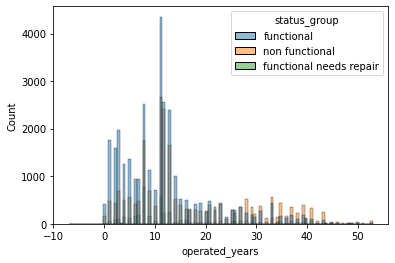

In [15]:
sns.histplot(data=cleaned_train, x="operated_years", hue="status_group")

## Encode Categorical Data

In [106]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  float64
 4   installer          59400 non-null  object 
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  object 
 8   subvillage         59400 non-null  object 
 9   region             59400 non-null  object 
 10  district_code      59400 non-null  int64  
 11  lga                59400 non-null  object 
 12  population         59400 non-null  int64  
 13  public_meeting     59400 non-null  object 
 14  scheme_management  59400 non-null  object 
 15  permit             59400 non-null  object 
 16  extraction_type    594

In [16]:
def encode_categorical(data):
  data["funder"] = pd.factorize(data["funder"])[0]
  data["installer"] = pd.factorize(data["installer"])[0]
  data["basin"] = pd.factorize(data["basin"])[0]
  data["subvillage"] = pd.factorize(data["subvillage"])[0]
  data["region"] = pd.factorize(data["region"])[0]
  data["lga"] = pd.factorize(data["lga"])[0]
  data["public_meeting"] = pd.factorize(data["public_meeting"])[0]
  data["scheme_management"] = pd.factorize(data["scheme_management"])[0]
  data["permit"] = pd.factorize(data["permit"])[0]
  data["extraction_type"] = pd.factorize(data["extraction_type"])[0]
  data["management"] = pd.factorize(data["management"])[0]
  data["payment_type"] = pd.factorize(data["payment_type"])[0]
  data["water_quality"] = pd.factorize(data["water_quality"])[0]
  data["quantity"] = pd.factorize(data["quantity"])[0]
  data["source"] = pd.factorize(data["source"])[0]
  data["waterpoint_type"] = pd.factorize(data["waterpoint_type"])[0]

In [17]:
 encode_categorical(cleaned_train)
 encode_categorical(cleaned_test)

In [18]:
labels["status_group"] = labels["status_group"].map({"functional": 0, "non functional": 1, "functional needs repair": 2})

## Normalize Data

In [110]:
print(cleaned_train["latitude"].max(), cleaned_train["latitude"].mean())
print(cleaned_train["longitude"].max(), cleaned_train["longitude"].mean())
print(cleaned_train["operated_years"].max(), cleaned_train["operated_years"].mean())

-2e-08 -5.706032659626503
40.34519307 34.07742669202832
53.0 13.927382154882155


In [19]:
from sklearn.preprocessing import MinMaxScaler
normalize_features = ["amount_tsh", "gps_height", "population"]
scaler = MinMaxScaler(feature_range=(0,30))
cleaned_train[normalize_features] = scaler.fit_transform(cleaned_train[normalize_features])
cleaned_test[normalize_features] = scaler.fit_transform(cleaned_test[normalize_features])

In [112]:
cleaned_train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,population,public_meeting,scheme_management,permit,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,operated_years
0,69572,0.514269,0,15.524476,0,34.938093,-9.856322,0,0,0,5,0,0.107213,0,0,0,0,0,0,0,0,0,0,functional,12.0
1,8776,0.017126,1,15.618881,1,34.698766,-2.147466,1,1,1,2,1,0.275410,1,1,1,0,1,1,0,1,1,0,functional,3.0
2,34310,0.002126,2,8.139860,2,37.460664,-3.821329,2,2,2,4,2,0.245902,0,0,1,0,0,2,0,0,2,1,functional,4.0
3,67743,0.004269,3,3.702797,3,38.486161,-11.155298,3,3,3,63,3,0.057049,0,0,1,1,0,1,0,2,3,1,non functional,27.0
4,19728,0.042840,4,13.741259,4,31.130847,-1.825359,1,4,4,1,4,0.000000,0,2,1,0,2,1,0,3,1,0,functional,8.0


In [113]:
cleaned_train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,district_code,lga,population,public_meeting,scheme_management,permit,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,status_group,operated_years
0,69572,0.514269,0,15.524476,0,34.938093,-9.856322,0,0,0,5,0,0.107213,0,0,0,0,0,0,0,0,0,0,functional,12.0
1,8776,0.017126,1,15.618881,1,34.698766,-2.147466,1,1,1,2,1,0.275410,1,1,1,0,1,1,0,1,1,0,functional,3.0
2,34310,0.002126,2,8.139860,2,37.460664,-3.821329,2,2,2,4,2,0.245902,0,0,1,0,0,2,0,0,2,1,functional,4.0
3,67743,0.004269,3,3.702797,3,38.486161,-11.155298,3,3,3,63,3,0.057049,0,0,1,1,0,1,0,2,3,1,non functional,27.0
4,19728,0.042840,4,13.741259,4,31.130847,-1.825359,1,4,4,1,4,0.000000,0,2,1,0,2,1,0,3,1,0,functional,8.0


## Model Selection

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost.sklearn import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [21]:
X = cleaned_train.drop(["id", "status_group"], axis=1)
y = labels["status_group"]
X_test = cleaned_test.drop(["id"], axis=1)

In [116]:
knn_model = KNeighborsClassifier()
scores = cross_val_score(knn_model, X, y, scoring="f1_macro")
print(scores.mean(), "+/-", scores.std())

0.4463215028688472 +/- 0.0022299864162408636


In [23]:
rf_model = RandomForestClassifier(n_estimators=1000)
scores = cross_val_score(rf_model, X, y, scoring="f1_macro")
print(scores.mean(), "+/-", scores.std())

0.691829291384696 +/- 0.003918128409882727


In [22]:
xgb_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', eta = 0.1, max_depth = 12, learning_rate = 0.1)
scores = cross_val_score(xgb_model, X, y, scoring="f1_macro")
print(scores.mean(), "+/-", scores.std())

0.6856969172107348 +/- 0.006207760211700589


In [121]:
lbgm_model = LGBMClassifier(booster = 'gbtree', eta = 0.1, max_depth = 10, learning_rate = 0.1)
scores = cross_val_score(lbgm_model, X, y, scoring="f1_macro")
print(scores.mean(), "+/-", scores.std())

0.6369487625494246 +/- 0.007766049541493481


## Feature Selection

In [24]:
rf_model.fit(X, y)
feature_importance = pd.DataFrame({'feature': X.columns,'importance':np.round(rf_model.feature_importances_, 3)})
feature_importance = feature_importance.sort_values('importance', ascending=False).set_index('feature')

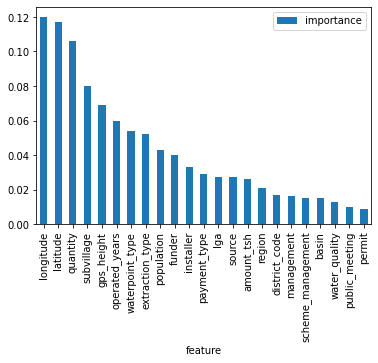

In [25]:
feature_importance.plot.bar()

In [26]:
feature_importance.head(23)

,importance
feature,
longitude,0.120
latitude,0.117
quantity,0.106
subvillage,0.080
gps_height,0.069
operated_years,0.060
waterpoint_type,0.054
extraction_type,0.052
population,0.043


In [118]:
X = X.drop(["public_meeting", "permit", "water_quality"], axis=1)
X_test = X_test.drop(["public_meeting", "permit", "water_quality"], axis=1)

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'n_estimators': [100, 400, 700, 1000],
    'max_depth': [20, 50, 70, 100, 100]
}

gs = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring="accuracy")
gs.fit(X, y) 
gs.best_params_

## Building Final Model

In [132]:
model = RandomForestClassifier(n_estimators=1000, max_depth=50)
model.fit(X, y)
cross_val_score(model, X, y, scoring="f1_macro")

array([0.7016684 , 0.69358406, 0.69146369, 0.69034885, 0.69210635])

In [133]:
predictions = model.predict(X_test)
print(predictions[:20])

[0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1]


In [134]:
sub = pd.DataFrame(columns=['id', 'status_group'])
sub.set_index('id')
sub["id"] = cleaned_test["id"]
sub["status_group"] = predictions
sub["status_group"] = sub["status_group"].map({0: "functional", 1: "non functional", 2: "functional needs repair"})
sub.to_csv('my_submission.csv', index=True)
from google.colab import files
files.download('my_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>